<a href="https://colab.research.google.com/github/Khadeeja-Moin/Colab---VGG19/blob/main/Attempt%202/VGg_19_(Preprocessed_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.layers import MaxPooling2D

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3'
test_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Testing3'

In [6]:
# re-size all the images to this because images in dataset are f varying sizes
IMAGE_SIZE = [224, 224]

In [7]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
# Images in our dataset are gray-scale

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# include_top = False actually drops first and last layer of model
# My first layer should be 224 * 224 (Image dimension)
# My last year will have 4 classes according to dataset

In [8]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [9]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(4,activation="softmax"))  # 4 Neurons in the Output Layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5712 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Testing3',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [16]:
type(training_set)

keras.src.preprocessing.image.DirectoryIterator

In [17]:
# Initialize lists to hold the images and labels
test_data = []
test_labels = []

# Loop through the iterator and collect all images and labels
for _ in range(len(test_set)):
    images, labels = test_set.next()
    test_data.append(images)
    test_labels.append(labels)

# Convert lists to NumPy arrays
test_data = np.concatenate(test_data)
test_labels = np.concatenate(test_labels)

# Verify the shapes of the resulting arrays
print("Shape of the image arrays:", test_data.shape)
print("Shape of the label arrays:", test_labels.shape)

Shape of the image arrays: (1311, 224, 224, 3)
Shape of the label arrays: (1311, 4)


In [18]:
# Initialize lists to hold the images and labels
train_data = []
train_labels = []

# Loop through the iterator and collect all images and labels
for _ in range(len(training_set)):
    images, labels = training_set.next()
    train_data.append(images)
    train_labels.append(labels)

# Convert lists to NumPy arrays
train_data = np.concatenate(train_data)
train_labels = np.concatenate(train_labels)

# Verify the shapes of the resulting arrays
print("Shape of the image arrays:", train_data.shape)
print("Shape of the label arrays:", train_labels.shape)

Shape of the image arrays: (5712, 224, 224, 3)
Shape of the label arrays: (5712, 4)


In [19]:
# Verify the shapes of the resulting arrays
print("Shape of the image arrays:", train_data.shape)
print("Shape of the label arrays:", train_labels.shape)

Shape of the image arrays: (5712, 224, 224, 3)
Shape of the label arrays: (5712, 4)


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  train_data,
  train_labels,
  validation_data=(test_data, test_labels),
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
179/179 [==============================] - 304s 2s/step - loss: 0.8884 - accuracy: 0.6530 - val_loss: 0.6717 - val_accuracy: 0.7681
Epoch 2/20
179/179 [==============================] - 303s 2s/step - loss: 0.4649 - accuracy: 0.8232 - val_loss: 0.9333 - val_accuracy: 0.7391
Epoch 3/20
179/179 [==============================] - 298s 2s/step - loss: 0.2996 - accuracy: 0.8848 - val_loss: 0.4813 - val_accuracy: 0.8192
Epoch 4/20
179/179 [==============================] - 299s 2s/step - loss: 0.1790 - accuracy: 0.9356 - val_loss: 0.8234 - val_accuracy: 0.7910
Epoch 5/20
179/179 [==============================] - 307s 2s/step - loss: 0.0916 - accuracy: 0.9688 - val_loss: 0.7294 - val_accuracy: 0.8146
Epoch 6/20
179/179 [==============================] - 303s 2s/step - loss: 0.0572 - accuracy: 0.9806 - val_loss: 1.0283 - val_accuracy: 0.7910
Epoch 7/20
179/179 [==============================] - 305s 2s/step - loss: 0.0319 - accuracy: 0.9918 - val_loss: 1.1060 - val_accuracy: 0.8169

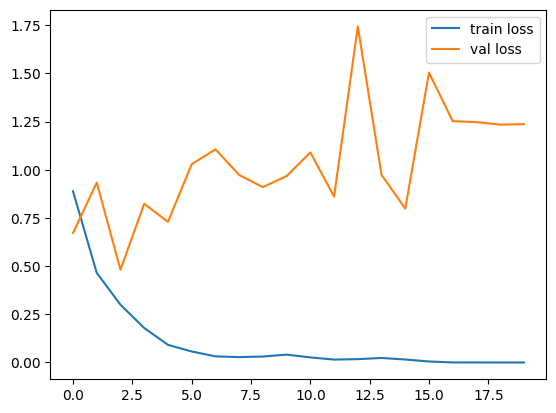

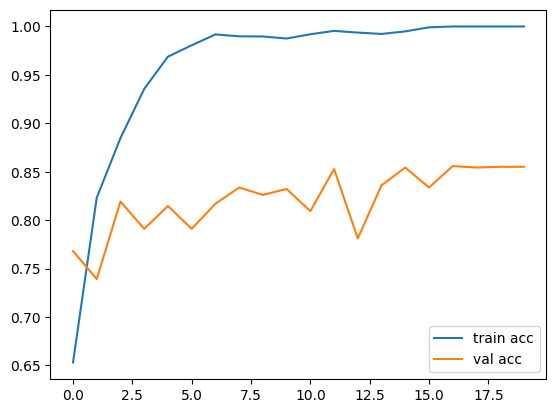

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19_preprocessed.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
model.save('model_vgg19_preprocessed.keras')


In [25]:
from tensorflow.keras import datasets, layers, models

In [28]:
y_pred = model.predict(test_data)

41/41 [==============================] - 27s 645ms/step


In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train = Train-data
y-train = Train-labels

X-test = test-data
y-test = test-labels

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [32]:
print(f"Shape of test_labels: {test_labels.shape}, Type: {type(test_labels)}")
print(f"Shape of y_pred: {y_pred.shape}, Type: {type(y_pred)}")

print(f"First 5 elements of test_labels: {test_labels[:5]}")
print(f"First 5 elements of y_pred: {y_pred[:5]}")

Shape of test_labels: (1311, 4), Type: <class 'numpy.ndarray'>
Shape of y_pred: (1311, 4), Type: <class 'numpy.ndarray'>
First 5 elements of test_labels: [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
First 5 elements of y_pred: [[4.8031048e-03 9.9458176e-01 6.1502610e-04 4.8939931e-14]
 [6.1739804e-09 5.2685726e-01 8.1485124e-11 4.7314274e-01]
 [6.3634306e-11 1.1639304e-06 9.9999875e-01 4.7187180e-19]
 [7.0135728e-05 9.9982882e-01 1.0117050e-04 2.6194171e-12]
 [1.4183937e-08 3.6470196e-01 6.3529795e-01 1.6051023e-09]]


In [31]:
# compute the confusion matrix
cm = confusion_matrix(test_labels,y_pred)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets